In [17]:
import pandas as pd

master_df = pd.read_csv('/Users/alexandergursky/Local_Repository/Datasets/Dataset_Package/Spotify_Users/artist-user-countlisten.csv')

print(master_df.head(10))
print(master_df.columns)

   Unnamed: 0                        artistname  user  artist-value
0           0                    Elvis Costello     0           3.0
1           1  Elvis Costello & The Attractions     0           3.0
2           2                      Tiffany Page     0           4.0
3           5                            Lissie     0           8.0
4           6                    Paul McCartney     0           4.0
5           7                          Joe Echo     0          11.0
6          10                      The Breakers     0           3.0
7          12                       The Coronas     0           2.0
8          13                     Crowded House     0           6.0
9          17                      Joshua Radin     0           5.0
Index(['Unnamed: 0', 'artistname', 'user', 'artist-value'], dtype='object')


In [18]:
df = master_df.drop('Unnamed: 0', axis=1)

In [19]:
#piv_df = df.pivot_table(index='artistname', columns='user', values='artist-value', aggfunc='sum', observed=False)

In [20]:
print(df['artistname'].nunique())

289821


In [21]:
print(df['user'].nunique())

15918


In [22]:
print(df.head(25))

                            artistname  user  artist-value
0                       Elvis Costello     0           3.0
1     Elvis Costello & The Attractions     0           3.0
2                         Tiffany Page     0           4.0
3                               Lissie     0           8.0
4                       Paul McCartney     0           4.0
5                             Joe Echo     0          11.0
6                         The Breakers     0           3.0
7                          The Coronas     0           2.0
8                        Crowded House     0           6.0
9                         Joshua Radin     0           5.0
10                   Cocktail Slippers     0           7.0
11               Crosby, Stills & Nash     0           3.0
12                     The Len Price 3     0           7.0
13       Paul McCartney & Eric Clapton     0           1.0
14                  Noah And The Whale     0           2.0
15  Noel Gallagher's High Flying Birds     0           2

In [23]:
print(df.describe())

               user  artist-value
count  3.287465e+06  3.285631e+06
mean   8.011826e+03  3.913438e+00
std    4.563016e+03  1.281057e+01
min    0.000000e+00  1.000000e+00
25%    4.068000e+03  1.000000e+00
50%    8.038000e+03  1.000000e+00
75%    1.198900e+04  2.000000e+00
max    1.591700e+04  3.346000e+03


In [24]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287465 entries, 0 to 3287464
Data columns (total 3 columns):
 #   Column        Dtype  
---  ------        -----  
 0   artistname    object 
 1   user          int64  
 2   artist-value  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 75.2+ MB
None


In [25]:
#piv_df = df.pivot_table(index='artistname', columns='user', values='artist-value', aggfunc='sum', sparse=True)
df['artistname'] = df['artistname'].astype('category')
df['user'] = df['user'].astype('int16')

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287465 entries, 0 to 3287464
Data columns (total 3 columns):
 #   Column        Dtype   
---  ------        -----   
 0   artistname    category
 1   user          int16   
 2   artist-value  float64 
dtypes: category(1), float64(1), int16(1)
memory usage: 54.2 MB
None


In [26]:
print(df['artist-value'].isna().sum())

1834


In [27]:
print(df['artistname'].isna().sum())

1834


In [28]:
df = df.dropna()

In [29]:
df['artist-value'] = df['artist-value'].astype('int32')

print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3285631 entries, 0 to 3287464
Data columns (total 3 columns):
 #   Column        Dtype   
---  ------        -----   
 0   artistname    category
 1   user          int16   
 2   artist-value  int32   
dtypes: category(1), int16(1), int32(1)
memory usage: 66.7 MB
None


3346
Axes(0.125,0.11;0.775x0.77)


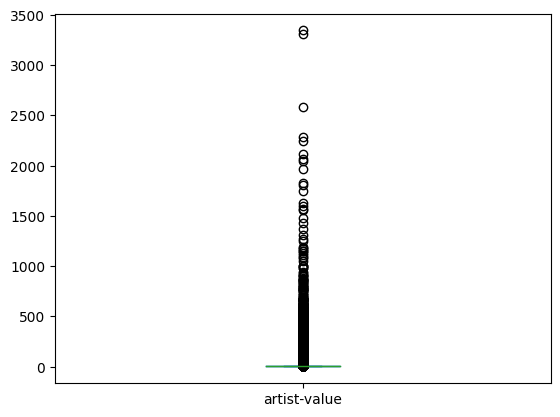

In [30]:
print(df['artist-value'].max())
print(df['artist-value'].plot(kind='box'))

In [31]:
#piv_df = df.pivot_table(index='artistname', columns='user', values='artist-value', aggfunc='sum', fill_value=0)

In [32]:
import numpy as np
import multiprocessing as mp
from Python_Repo.ML_AI.Spotify_NMF_Project.my_function import compute_pivot_table

chunks = np.array_split(df, 4)

def compute_pivot_table(chunk):
    pivot = pd.pivot_table(chunk, index='artistname', columns='user', values='artist-value', aggfunc='sum', fill_value=0)
    return pivot


pool = mp.Pool(processes=4)

results = pool.map(compute_pivot_table, chunks)

final_pivot = pd.concat(results)

pool.close()
pool.join()

ModuleNotFoundError: No module named 'Python_Repo'